# Part A : Deep Model

Look for file name : [0][First_training]DAI_ASSIGNMENT_2_Part_A.ipynb

In [1]:
%tensorflow_version 2.x

In [2]:
# FGSM - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm
# colab ref - https://colab.research.google.com/github/shreehari117/ML-2/blob/master/Sureshbabu_Shree_Hari_aml.ipynb
# https://colab.research.google.com/github/andantillon/cleverhans/blob/master/tutorials/future/tf2/notebook_tutorials/mnist_fgsm_tutorial.ipynb

# Install bleeding edge version of cleverhans
# !pip install cleverhans==2.1.0
# !pip install cleverhans

from google.colab import drive 
drive.mount('/content/gdrive') 
import os
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2'
!ls
%cd '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images'
!ls
!find . -maxdepth 2 -type d
!find . -maxdepth 1 -mindepth 1 -type d -exec sh -c 'echo "{} : $(find "{}" -type f | wc -l)" file\(s\)' \;

!python --version
# !pip install cleverhans==2.1.0
!pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model




# import tensorflow as tf
# from tensorflow import keras
# from keras.layers import Input, Lambda, Flatten, AveragePooling2D, Dropout, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
# from keras.models import Model, load_model
# from keras.applications.resnet50 import preprocess_input, decode_predictions
# from keras.applications import InceptionV3
# from keras.applications.resnet50 import preprocess_input
# from keras.applications.resnet50 import ResNet50
# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator, load_img
# from keras.models import Sequential, Model
# from keras import Sequential
# from keras.layers import Dense, BatchNormalization
from keras import backend

# from cleverhans.utils_keras import KerasModelWrapper
# from cleverhans.attacks import FastGradientMethod, MadryEtAl, DeepFool, CarliniWagnerL2
#Import necessary packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Install bleeding edge version of cleverhans

from builtins import range, input

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False
import cv2
from glob import glob
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import cleverhans
print("\nTensorflow Version: " + tf.__version__)
print("Cleverhans Version: " + cleverhans.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

Mounted at /content/gdrive
/content/gdrive/My Drive/DAI_ASSIGNMENT_2
Classes.py  Images  processed_images
/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images
'Copy of final_model.h5'	       final_model.h5		    test
'Copy of final_model_python2.h5'       final_model_python2.h5	    train
'Copy of final_model_python2_tf1.h5'   final_model_python2_tf1.h5
.
./train
./train/cane
./train/cavallo
./train/elefante
./train/farfalla
./train/gallina
./train/gatto
./train/mucca
./train/pecora
./train/ragno
./train/scoiattolo
./test
./test/cane
./test/cavallo
./test/elefante
./test/farfalla
./test/gallina
./test/gatto
./test/mucca
./test/pecora
./test/ragno
./test/scoiattolo
./train : 15702 file(s)
./test : 10477 file(s)
Python 3.6.9
  Cloning https://github.com/tensorflow/cleverhans.git to /tmp/pip-install-y8efguim/cleverhans
  Running command git clone -q https://github.com/tensorflow/cleverhans.git /tmp/pip-install-y8efguim/cleverhans
     |████████████████████████████████| 163kB 4.3MB/s 


In [3]:
h,w = (224,224)
batch = 32
train = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/train'
test = '/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/test'

dataloader = ImageDataGenerator(
                                  preprocessing_function = preprocess_input,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  )
train_loader = dataloader.flow_from_directory(
    train, 
    target_size = (h,w),
    batch_size = batch,
    class_mode= 'categorical',
    subset = 'training'
)

test_loader = dataloader.flow_from_directory(
    test, 
    target_size = (h,w),
    batch_size = 1,
    class_mode= 'categorical',
    subset = 'training'
)

print("testing example")
xtestex,ytestex = test_loader.next()
print(xtestex.shape)
print(ytestex.shape)
print("training example")
xtrainex, ytrainex = train_loader.next()
print(xtrainex.shape)
print(ytrainex.shape)
model = keras.models.load_model('final_model.h5') # My Saved model (Trained with Python 3 & TF 2.X)

# My Saved model (Trained with Python 2 & TF 1.X) https://drive.google.com/file/d/1PMmIIxvlDAYHNqs9CluWIVUWNu6jUoOS/view?usp=sharing
# My Saved model (Trained with Python 2 & TF 2.X) https://drive.google.com/file/d/1PDHK9pYj7_dZCUzdD7cHby5ikv5gw9G2/view?usp=sharing
# My Saved model (Trained with Python 3 & TF 2.X) https://drive.google.com/file/d/1HyQ5dyimMbY9yGqtH-cbvX71XTziIKqQ/view?usp=sharing

Found 15702 images belonging to 10 classes.
Found 10477 images belonging to 10 classes.
testing example
(1, 224, 224, 3)
(1, 10)
training example
(32, 224, 224, 3)
(32, 10)


In [ ]:
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
# Dont run this of you are not training, only run for training else load model from previous step
base_model = ResNet50(weights=None,input_shape=(224,224,3),include_top=False)
base_model.summary()
new_model = base_model.output
new_model = AveragePooling2D(pool_size=(7, 7))(new_model)
new_model = Flatten(name="flatten")(new_model)
new_model = Dense(256, activation="relu")(new_model)
# new_model = Dropout(0.5)(new_model)
new_model = Dense(10, activation="softmax")(new_model)
model = Model(inputs=base_model.input, outputs=new_model)
# import torch
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
with tf.device('/device:GPU:0'):
  model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(train_loader,epochs=20)
model.save('final_model.h5')

In [4]:
test_loader

In [5]:
# image_data = []
# for x in test_loader:
#   print(x[0][0].shape)
#   break

len(test_loader)

10477

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
dir = "/content/gdrive/My Drive/DAI_ASSIGNMENT_2/processed_images/test"
classes = ["cane",
          "cavallo",
          "elefante",
          "farfalla",
          "gallina",
          "gatto",
          "mucca",
          "pecora",
          "ragno",
          "scoiattolo"]

data = []
for clas in classes:
  path = os.path.join(dir, clas)
  label = classes.index(clas)
  print(label)
  for img in os.listdir(path): # Gets the list of all files in the directory
    imagepath = os.path.join(path,img)
    # print(str(imagepath))
    s_image = cv2.imread(imagepath, 1)
    try:
      s_image = cv2.resize(s_image,(224,224))
      image_array = np.array(s_image).flatten()
      data.append([image_array, label])
    except Exception as e:
      pass
    
print(len(data))



0
1
2
3
4
5
6
7
8
9
10477


In [7]:
np.array(data[0][0]).shape

(150528,)

In [8]:
X_features = []
Y_labels = []

for x,y in data:
  X_features.append(x)
  Y_labels.append(y)
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.01)

xdata = X_train
ylabels = Y_train
print("Sizes of data and labels")
print(len(xdata))
print(len(ylabels))

Sizes of data and labels
10372
10372


In [9]:
xdata = np.array(xdata)
ylabels = np.array(ylabels)
xdata = xdata.reshape(10372,224,224,3)

In [10]:
print("Sizes of data and labels")
print((xdata.shape))
print((ylabels.shape))

Sizes of data and labels
(10372, 224, 224, 3)
(10372,)


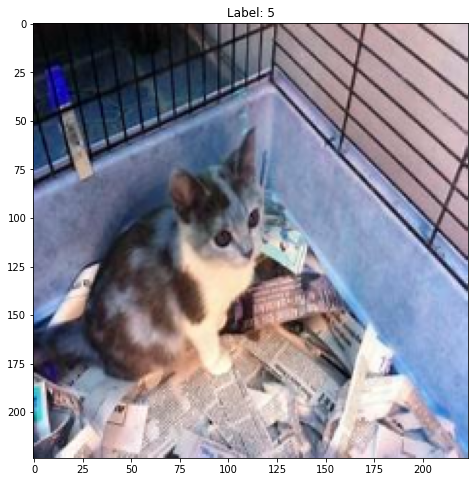

In [11]:
# Import the attack

from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method

#The attack requires the model to ouput the logits
logits_model = tf.keras.Model(model.input,model.layers[-1].output)

random_index = np.random.randint(xdata.shape[0])

original_image = xdata[random_index]
original_image = tf.convert_to_tensor(original_image.reshape((1,224,224,3))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor

original_label = ylabels[random_index]
original_label = np.reshape(original_label, (1,)).astype('int64') # Give label proper shape and type for cleverhans

#Show the image
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(original_image, (224,224,3)))
plt.title("Label: {}".format(original_label[0]))

plt.show()

# Part B : Attacks


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


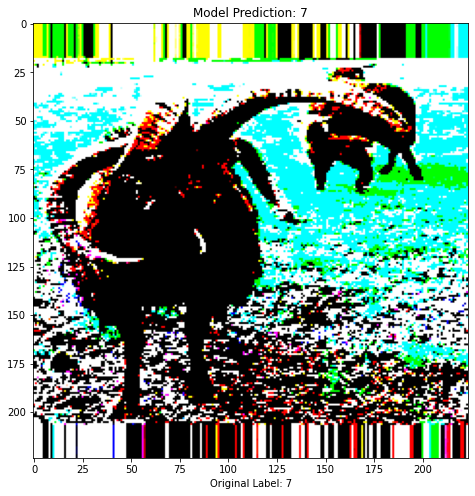

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


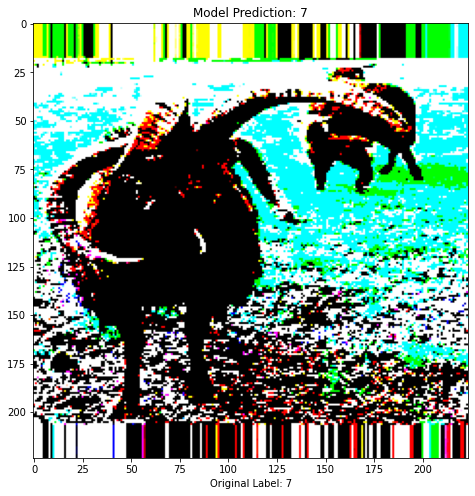

    1/10000 [..............................] - ETA: 64:37:37test acc on clean examples (%): 0.000
test acc on FGM adversarial examples (%): 100.000
test acc on PGD adversarial examples (%): 100.000


In [12]:
eps=0.1
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(10000)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)

  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(np.argmax(y_pred_fgm)))
  plt.xlabel("Original Label: {}".format(y[0]))

  plt.show()

  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(np.argmax(y_pred_fgm)))
  plt.xlabel("Original Label: {}".format(y[0]))

  plt.show()

  progress_bar_test.add(x.shape[0])
  break
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


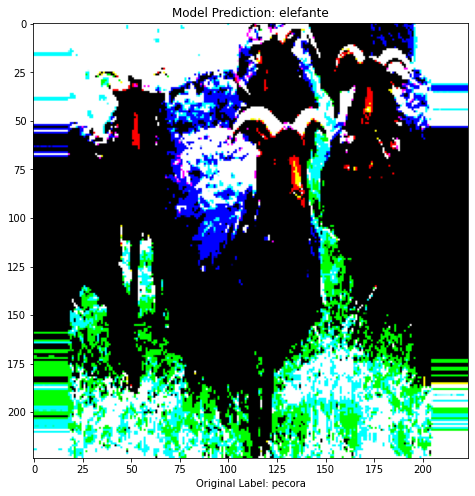

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


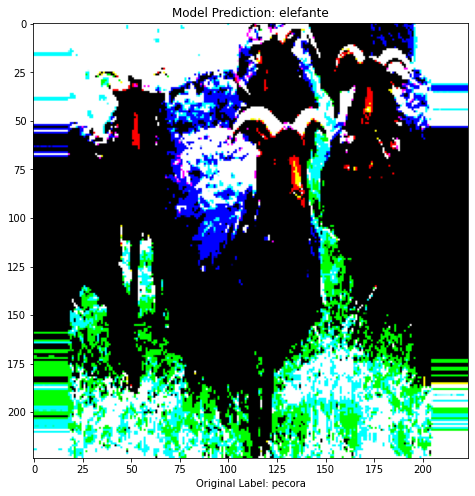

  1/100 [..............................] - ETA: 35:03test acc on clean examples (%): 100.000
test acc on FGM adversarial examples (%): 0.000
test acc on PGD adversarial examples (%): 100.000


In [13]:
eps=0.7
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(100)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)

  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()

  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()

  progress_bar_test.add(x.shape[0])
  break  
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))

In [14]:
# basic_iterative_method, momentum_iterative_method
# ref: https://github.com/Fuu3214/Grad_Proj/blob/4adc3147fdaa5a0acfca61c67188608b07880048/attack_and_generate_attr.ipynb
# https://github.com/Carco-git/CW_Attack_on_MNIST/blob/master/CW_Attack_l2.ipynb
# https://github.com/ocatak-zz/adversarial-ml-training/blob/5e6984a28e9375fb40362b17ffd931f0b8da2e70/adversarial-machine-learning-attacks-and-mitigations.ipynb

SSIM
c. Report SSIM(Structural Similarity) for the predictions. Infer ​[ 10 Marks]

# Part C: SSIM

for projected_gradient_descent, fast_gradient_method, basic_iterative_method, momentum_iterative_method

FGM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


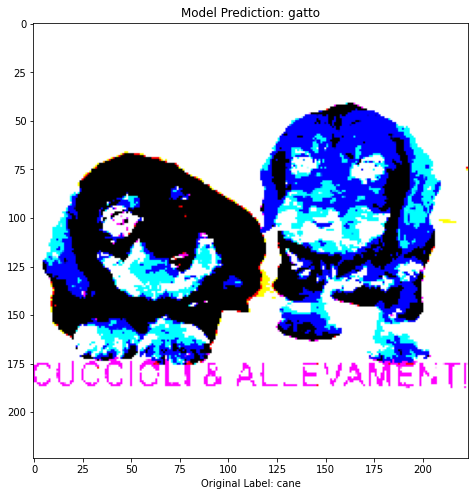

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


SSIM: 0.3156252526186438
forFGM
PGD


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


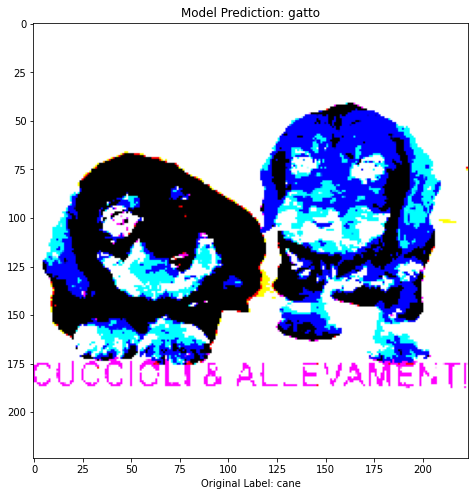

SSIM: 0.4094783111806649
forPGD
BIM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


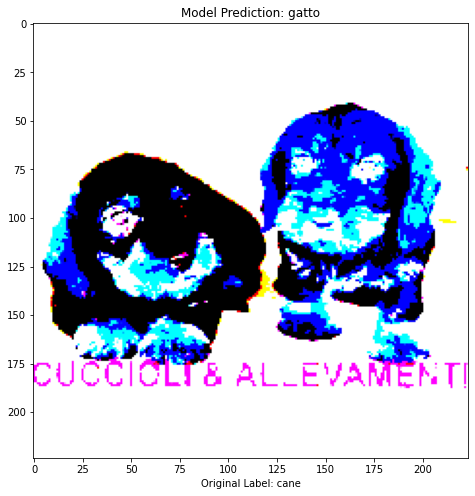

SSIM: 0.4094783111806649
forBIM
  1/100 [..............................] - ETA: 1:07:08test acc on clean examples (%): 100.000
test acc on FGM adversarial examples (%): 0.000
test acc on PGD adversarial examples (%): 0.000
test acc on BIM adversarial examples (%): 0.000


In [20]:
eps=0.7
# ref: https://ourcodeworld.com/articles/read/991/how-to-calculate-the-structural-similarity-index-ssim-between-two-images-with-python
# 1. Import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from PIL import Image
def ssim(imgA, imgB, attack_name):
  # get image from numpy array
  imageA = Image.fromarray(imgA[0], 'RGB')
  imageB = Image.fromarray(np.array(imgB[0]), 'RGB')

  # 3. Convert the images to grayscale
  grayA = cv2.cvtColor(np.float32(imageA),cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(np.float32(imageB),cv2.COLOR_RGB2GRAY)

  # 4. Compute the Structural Similarity Index (SSIM) between the two
  #    images, ensuring that the difference image is returned
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")

  # 5. You can print only the score if you want
  print("SSIM: {}".format(score))
  print("for"+ str(attack_name))



from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, basic_iterative_method, momentum_iterative_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
test_acc_bim = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(100)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)
  # FGM # FGM # FGM # FGM # FGM # FGM # FGM # FGM# FGM # FGM # FGM
  print("FGM")
  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_fgm,"FGM")
  # PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD
  print("PGD")
  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_pgd)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_pgd,"PGD")
  # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM # BIM 

  print("BIM")
  x_bim = basic_iterative_method(model,x,eps,0.01,40,norm=np.inf)
  y_pred_bim = model(x_bim)
  test_acc_bim(y, y_pred_bim)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_bim, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_bim)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_bim,"BIM")

  progress_bar_test.add(x.shape[0])
  break  
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))
print('test acc on BIM adversarial examples (%): {:.3f}'.format(test_acc_bim.result() * 100))

FGM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


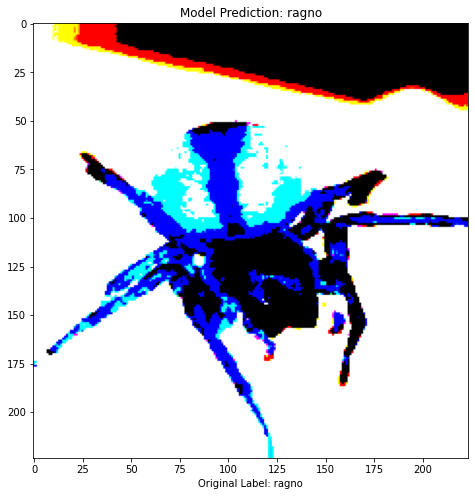

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.


SSIM: 0.31210215785883466
forFGM
PGD


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


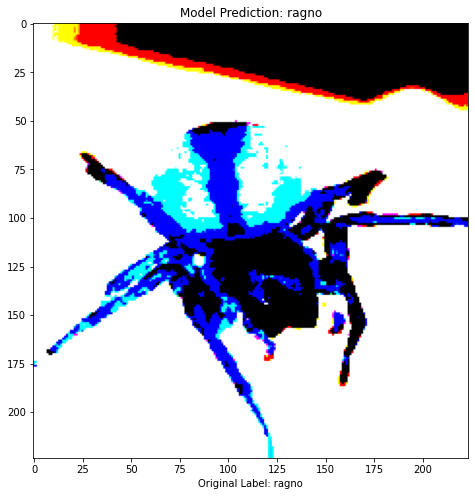

SSIM: 0.3480205429185158
forPGD
MIM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


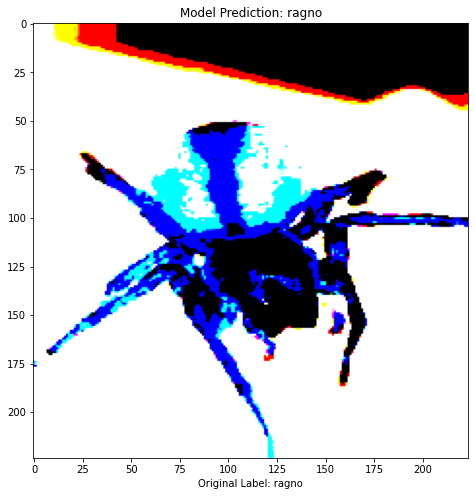

SSIM: 0.31583460985752815
forMIM
  1/100 [..............................] - ETA: 1:09:51test acc on clean examples (%): 100.000
test acc on FGM adversarial examples (%): 100.000
test acc on PGD adversarial examples (%): 100.000
test acc on MIM adversarial examples (%): 100.000


In [21]:
eps=0.7
# ref: https://ourcodeworld.com/articles/read/991/how-to-calculate-the-structural-similarity-index-ssim-between-two-images-with-python
# 1. Import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from PIL import Image
def ssim(imgA, imgB, attack_name):
  # get image from numpy array
  imageA = Image.fromarray(imgA[0], 'RGB')
  imageB = Image.fromarray(np.array(imgB[0]), 'RGB')

  # 3. Convert the images to grayscale
  grayA = cv2.cvtColor(np.float32(imageA),cv2.COLOR_RGB2GRAY)
  grayB = cv2.cvtColor(np.float32(imageB),cv2.COLOR_RGB2GRAY)

  # 4. Compute the Structural Similarity Index (SSIM) between the two
  #    images, ensuring that the difference image is returned
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  diff = (diff * 255).astype("uint8")

  # 5. You can print only the score if you want
  print("SSIM: {}".format(score))
  print("for"+ str(attack_name))



from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, basic_iterative_method, momentum_iterative_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()
test_acc_MIM = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
progress_bar_test = tf.keras.utils.Progbar(100)
for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)
  # FGM # FGM # FGM # FGM # FGM # FGM # FGM # FGM# FGM # FGM # FGM
  print("FGM")
  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_fgm,"FGM")
  # PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD# PGD # PGD
  print("PGD")
  x_pgd = projected_gradient_descent(model, x, eps, 0.01, 40, np.inf)
  y_pred_pgd = model(x_pgd)
  test_acc_pgd(y, y_pred_pgd)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_pgd)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_pgd,"PGD")
  # MIM # MIM # MIM # MIM # MIM # MIM # MIM # MIM # MIM # MIM # MIM 

  print("MIM")
  x_MIM = momentum_iterative_method(model,x,eps,0.01,40,norm=np.inf)
  y_pred_MIM = model(x_MIM)
  test_acc_MIM(y, y_pred_MIM)
  #Show the image
  plt.figure()
  plt.grid(False)

  plt.imshow(np.reshape(x_MIM, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_MIM)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()
  ssim(x,x_MIM,"MIM")

  progress_bar_test.add(x.shape[0])
  break  
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))
print('test acc on PGD adversarial examples (%): {:.3f}'.format(test_acc_pgd.result() * 100))
print('test acc on MIM adversarial examples (%): {:.3f}'.format(test_acc_MIM.result() * 100))

# Part D: Detection 

Identify at least ​2 measures that can be used as a metric ​to detect adversarial perturbation ​and​ compare the results. Explain the measures in detail. ​Reference​: https://arxiv.org/abs/1702.04267 ​[ 20 Marks]

Once attacked (from previous steps), Now,I will detect the FGM attack. 



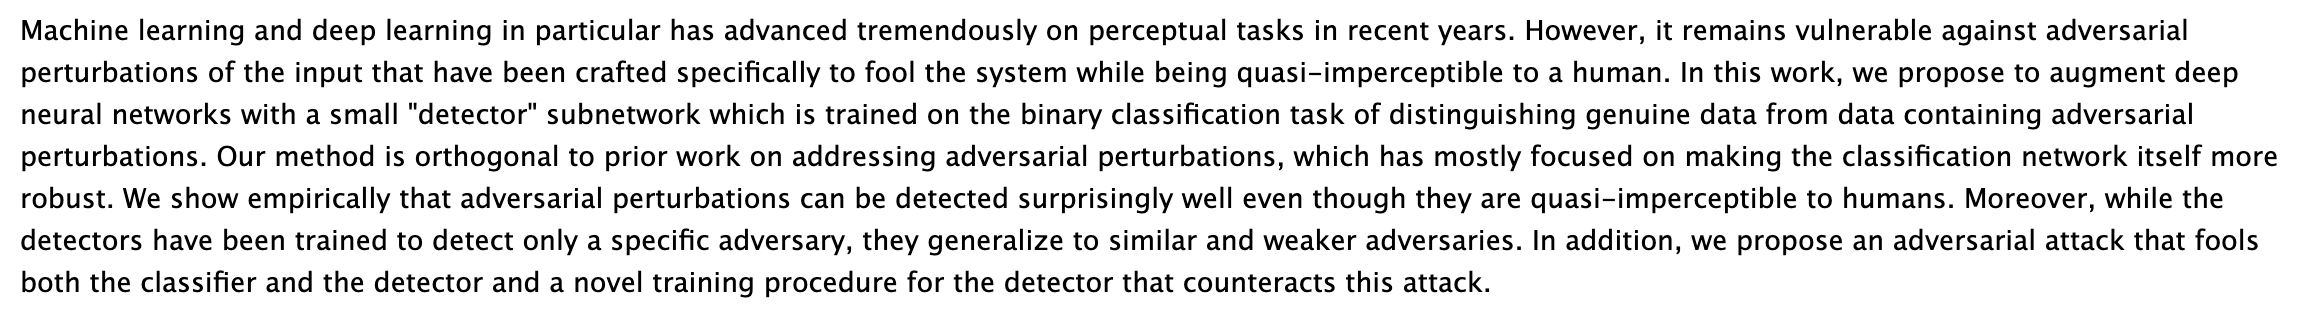

D.1 -> Detecting Adversarial Examples through Image Transformation
Authors: Shixin Tian, Guolei Yang, Ying Cai, Paper Link - http://bit.ly/daipaper

Classification results of Clean images are immune to transformations.

Classification results of Adversarial images are prone to transformations.

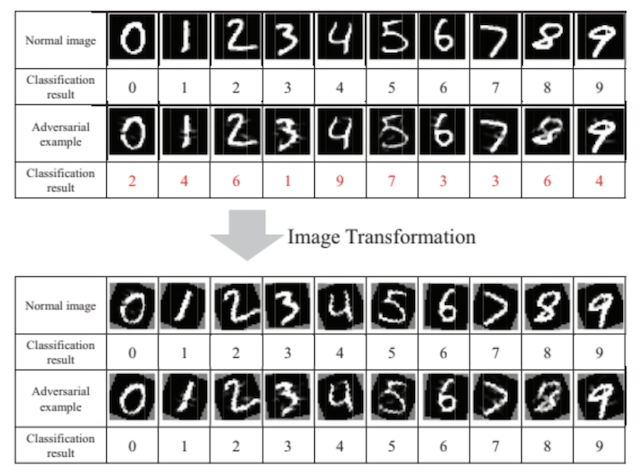

FGM


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


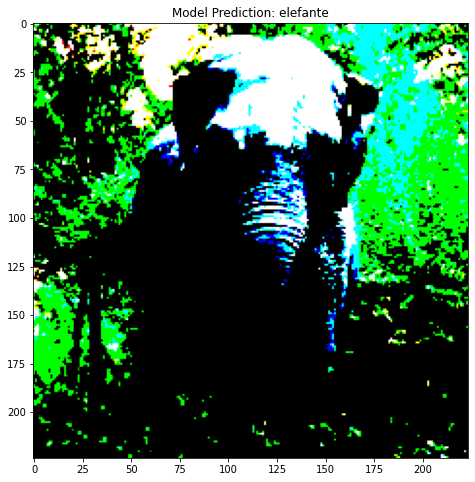

In [22]:
eps=0.1
# ref: https://ourcodeworld.com/articles/read/991/how-to-calculate-the-structural-similarity-index-ssim-between-two-images-with-python

import argparse
import imutils
import cv2
from PIL import Image
from cleverhans.future.tf2.attacks import fast_gradient_method

for x,y in test_loader:
  # x =xdata[i]
  # y=ylabels[i]
  preserve_x = x
  preserve_y = y
  y=np.where(y==1)[1] # One hot encoding to index
  y_pred = model(x)
  test_acc_clean(y, y_pred)
  # FGM # FGM # FGM # FGM # FGM # FGM # FGM # FGM# FGM # FGM # FGM
  print("FGM")
  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)
  plt.imshow(np.reshape(x_fgm, (224,224,3))) # Perturbed Image Without rotation
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))

  plt.show()
  break  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


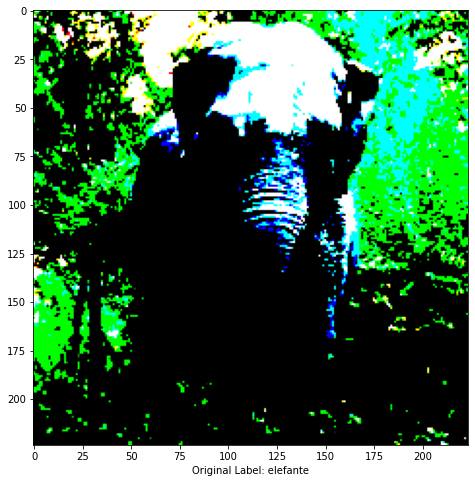

In [23]:
plt.figure()
plt.grid(False)
plt.imshow(np.reshape(x, (224,224,3))) # original Image without rotation  
plt.xlabel("Original Label: {}".format(classes[y[0]]))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


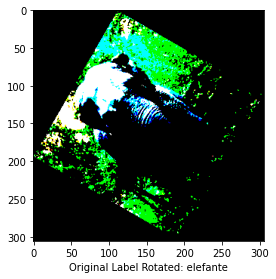

In [25]:

from scipy import ndimage
import matplotlib.pyplot as plt

img = preserve_x[0]
plt.figure(figsize=(24, 24))
plt.subplot(151)
rotated_img = ndimage.rotate(img, 60)
plt.imshow(rotated_img, cmap=plt.cm.gray)
plt.xlabel("Original Label Rotated: {}".format(classes[y[0]]))

plt.show()

In [26]:
# print(rotated_img.shape)
rotated_img_resize = np.resize(rotated_img, (1,224,224,3))
# print(rotated_img_resize.shape)
predicted_rotated_image = model(rotated_img_resize)
# print(predicted_rotated_image.shape)
print(classes[np.argmax(predicted_rotated_image)])

ragno


In [27]:
print("------------FINAL RESULTS DETECTION-------------------")
print("Without Rotation Original Label: ", classes[y[0]])
print("Without Rotation Predicted Label: ", classes[np.argmax(y_pred_fgm)])
print("With Rotation Predicted Label: ", classes[np.argmax(predicted_rotated_image)])

------------FINAL RESULTS DETECTION-------------------
Without Rotation Original Label:  elefante
Without Rotation Predicted Label:  elefante
With Rotation Predicted Label:  ragno


Supporting theory: 
The goal is to build a detector that is able to distinguish adversarial examples from the normal ones. The image is a normal image and the classifier can classify it correctly. The image is an adversarial example and it can attack the classifier successfully. You can classify the image as adversarial or normal image as Classification results of Adversarial images are prone to transformations.
Transforming adversarial examples with small rotations and shifts may get you correct classifications as well.
You do not always get this correct classification on rotations and transformations, in fact there is debate on contrary that rotating the adversarial images leads to more problems but were not considering the SOTA CW attack.
Author also mentioned this detection mechanism works properly when there are different patterns between normal images and adversarial examples..

# Part D: Detection (ii)
Pixel Deflection
ref: https://github.com/iamaaditya/pixel-deflection/blob/master/demo.ipynb

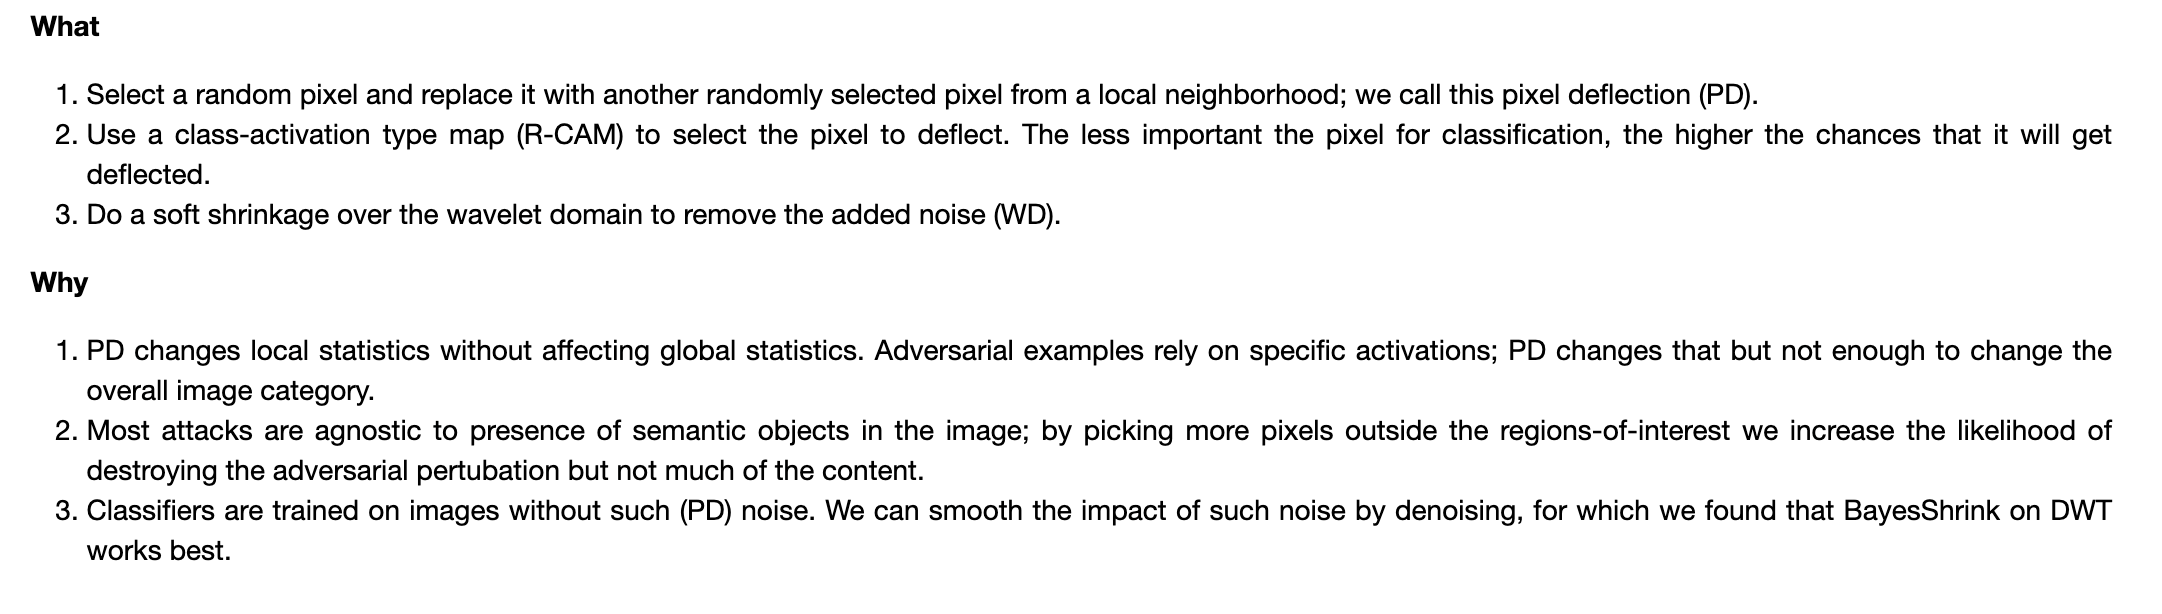

Not specifically following complete Mitigation process, but to the part where we get the detection mechanism.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


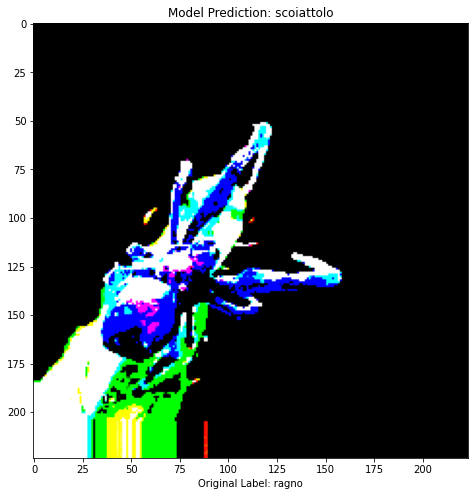

 11/100 [==>...........................] - ETA: 3:20:39

test acc on clean examples (%): 0.000
test acc on FGM adversarial examples (%): 0.000


In [39]:

eps=0.1
from cleverhans.future.tf2.attacks import fast_gradient_method
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_fgsm = tf.metrics.SparseCategoricalAccuracy()
# Evaluate on clean and adversarial data
for x,y in test_loader:
  y=np.where(y==1)[1]
  y_pred = model(x)
  test_acc_clean(y, y_pred)
  x_fgm = fast_gradient_method(model, x, eps, np.inf)
  y_pred_fgm = model(x_fgm)
  test_acc_fgsm(y, y_pred_fgm)
  #Show the image
  plt.figure()
  plt.grid(False)
  plt.imshow(np.reshape(x_fgm, (224,224,3)))
  plt.title("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))
  plt.xlabel("Original Label: {}".format(classes[y[0]]))

  plt.show()

  progress_bar_test.add(x.shape[0])
  break
print("\n")
print('test acc on clean examples (%): {:.3f}'.format(test_acc_clean.result() * 100))
print('test acc on FGM adversarial examples (%): {:.3f}'.format(test_acc_fgsm.result() * 100))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Original Label: ragno')

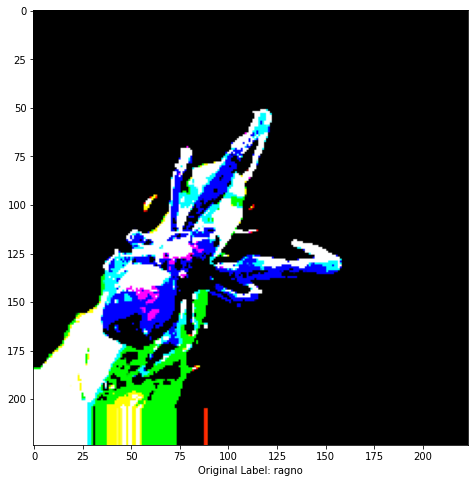

In [43]:
# Original Image
plt.imshow(x[0])
plt.xlabel("Original Label: {}".format(classes[y[0]]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'Model Prediction: scoiattolo')

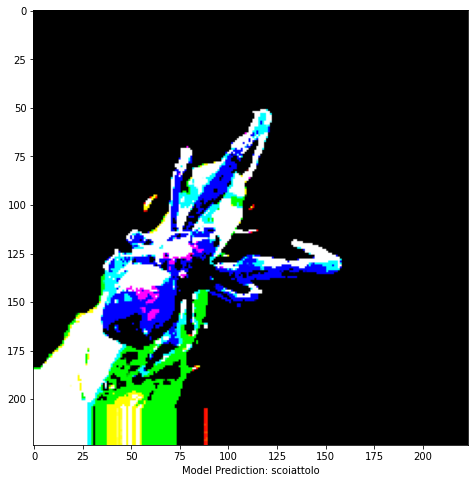

In [44]:
plt.imshow(x_fgm[0])
plt.xlabel("Model Prediction: {}".format(classes[np.argmax(y_pred_fgm)]))


In [59]:
n_original_image = x[0]
n_original_label = y[0]
p_perturbed_image = x_fgm[0]
p_perturbed_label = np.argmax(y_pred_fgm)
p_perturbed_probab = y_pred_fgm
other_labels = classes
print("p_perturbed_image ,p_perturbed_label ,n_original_image,n_original_label,\n",
      p_perturbed_image.shape ,
      classes[p_perturbed_label] , 
      n_original_image.shape,
      classes[n_original_label]
      )

p_perturbed_image ,p_perturbed_label ,n_original_image,n_original_label,
 (224, 224, 3) scoiattolo (224, 224, 3) ragno


Pixel Deflection for the original Image

In [79]:
empty_array = np.zeros(10)
for i in range(10):
  if(i==y[0]):
    empty_array[i] = 1
  else:
    empty_array[i] = 0

empty_array = np.array(empty_array)
print(empty_array)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


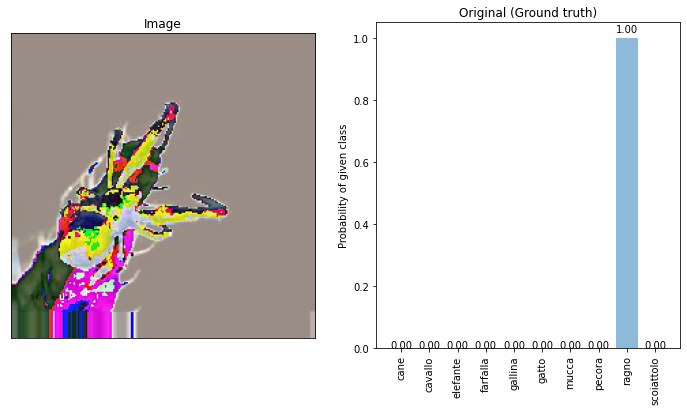

In [84]:
def visualize_classification(class_names, probs, image, true_class):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.sca(ax1)
    
    ax1.imshow(image.astype('uint8'))
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('Image')
    
    y_pos = np.arange(len(class_names))
    barlist = ax2.bar(y_pos, probs, align='center', alpha=0.5)
    if true_class >= 0 and true_class <= 4:
        barlist[true_class].set_color('g')
    ax2.set_xticks(y_pos, minor=False)
    ax2.set_xticklabels(class_names, minor=False, rotation='vertical')
    ax2.set_ylabel('Probability of given class')
    ax2.set_title('Original (Ground truth)')
   
    for bar in barlist:
        v = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., 1.02*v, '%.2f' % v, ha='center')

labels, class_names, probs = [0,1,2,3,4,5,6,7,8,9], classes, empty_array # np.array(y_pred[0])
label_index = y[0]
visualize_classification(class_names, probs, n_original_image, label_index)

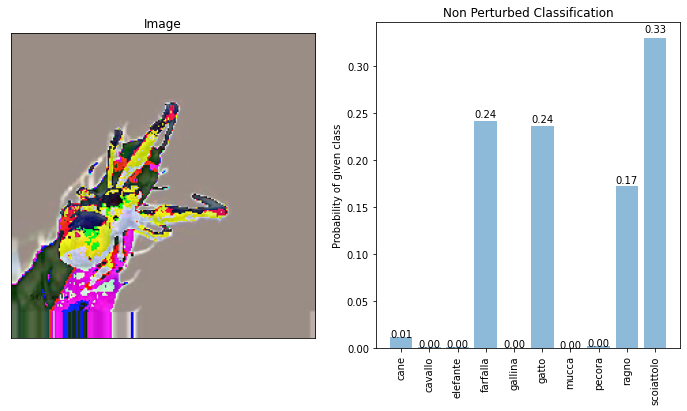

In [86]:
def visualize_classification(class_names, probs, image, true_class):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.sca(ax1)
    
    ax1.imshow(image.astype('uint8'))
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('Image')
    
    y_pos = np.arange(len(class_names))
    barlist = ax2.bar(y_pos, probs, align='center', alpha=0.5)
    if true_class >= 0 and true_class <= 4:
        barlist[true_class].set_color('g')
    ax2.set_xticks(y_pos, minor=False)
    ax2.set_xticklabels(class_names, minor=False, rotation='vertical')
    ax2.set_ylabel('Probability of given class')
    ax2.set_title('Non Perturbed Classification')
   
    for bar in barlist:
        v = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., 1.02*v, '%.2f' % v, ha='center')

labels, class_names, probs = [0,1,2,3,4,5,6,7,8,9], classes, np.array(y_pred[0])
label_index = y[0]
visualize_classification(class_names, probs, n_original_image, label_index)

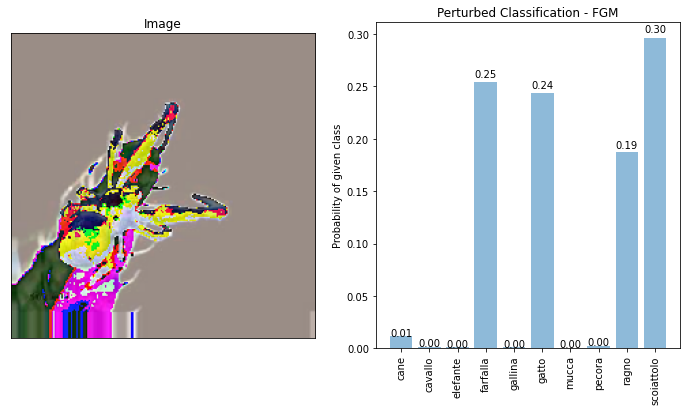

In [87]:
def visualize_classification(class_names, probs, image, true_class):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    fig.sca(ax1)
    
    ax1.imshow(image.astype('uint8'))
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title('Image')
    
    y_pos = np.arange(len(class_names))
    barlist = ax2.bar(y_pos, probs, align='center', alpha=0.5)
    if true_class >= 0 and true_class <= 4:
        barlist[true_class].set_color('g')
    ax2.set_xticks(y_pos, minor=False)
    ax2.set_xticklabels(class_names, minor=False, rotation='vertical')
    ax2.set_ylabel('Probability of given class')
    ax2.set_title('Perturbed Classification - FGM')
   
    for bar in barlist:
        v = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., 1.02*v, '%.2f' % v, ha='center')

labels, class_names, probs = [0,1,2,3,4,5,6,7,8,9], classes, np.array(y_pred_fgm[0])
label_index = y[0]
visualize_classification(class_names, probs, n_original_image, label_index)

# Part E (Using One Pixel Attack)

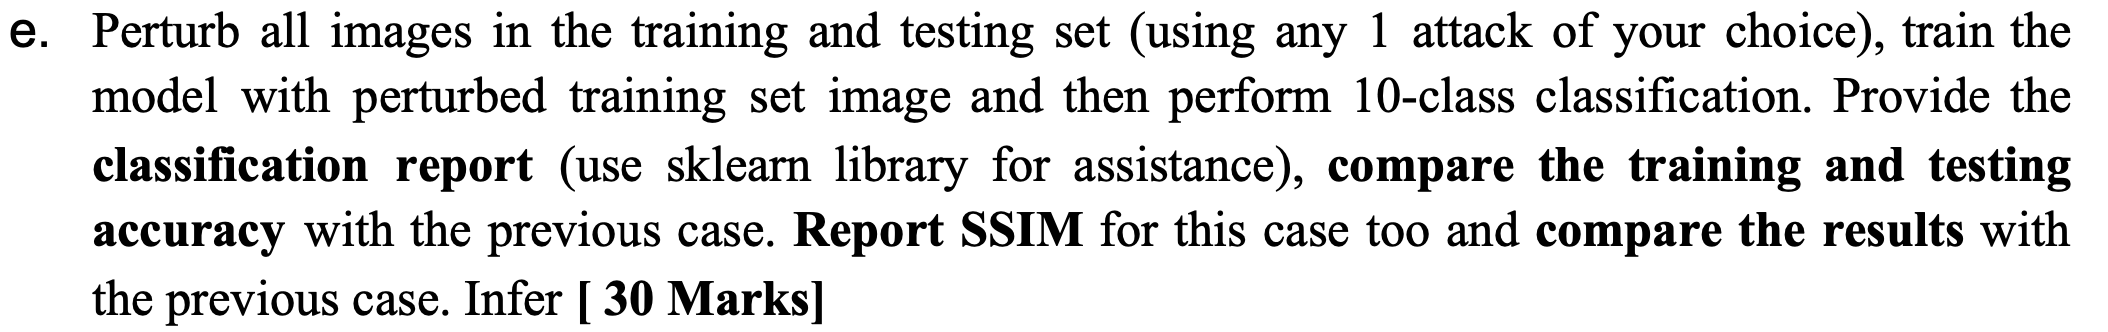

In [177]:
# ref: https://github.com/Hyperparticle/one-pixel-attack-keras/blob/master/1_one-pixel-attack-cifar10.ipynb
X_train,X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size=0.3)

print(np.array(X_train).reshape(7333,224,224,3).shape)
print(np.array(X_test).reshape(3144,224,224,3).shape)
print(np.array(Y_train).reshape(7333,1).shape)
print(np.array(Y_test).reshape(3144,1).shape)

X_train = np.array(X_train).reshape(7333,224,224,3)
X_test = np.array(X_test).reshape(3144,224,224,3)
Y_train = np.array(Y_train).reshape(7333,1)
Y_test = np.array(Y_test).reshape(3144,1)
print("--------AFTER RESHAPING--------")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7333, 224, 224, 3)
(3144, 224, 224, 3)
(7333, 1)
(3144, 1)
--------AFTER RESHAPING--------
(7333, 224, 224, 3)
(3144, 224, 224, 3)
(7333, 1)
(3144, 1)


In [178]:
# If running in Google Colab, import files
try:
    import google.colab
    in_colab = True
except:
    in_colab = False

if in_colab:
    !git clone https://github.com/Hyperparticle/one-pixel-attack-keras.git
    !mv -v one-pixel-attack-keras/* .
    !rm -rf one-pixel-attack-keras

# Python Libraries
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import cifar10
from keras import backend as K

# Helper functions
from differential_evolution import differential_evolution
import helper

matplotlib.style.use('ggplot')
np.random.seed(100) # just to ensure the future randomness point

Cloning into 'one-pixel-attack-keras'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 356 (delta 3), reused 0 (delta 0), pack-reused 346
Receiving objects: 100% (356/356), 44.57 MiB | 14.26 MiB/s, done.
Resolving deltas: 100% (204/204), done.
renamed 'one-pixel-attack-keras/1_one-pixel-attack-cifar10.ipynb' -> './1_one-pixel-attack-cifar10.ipynb'
renamed 'one-pixel-attack-keras/2_one-pixel-attack-imagenet.ipynb' -> './2_one-pixel-attack-imagenet.ipynb'
renamed 'one-pixel-attack-keras/attack.py' -> './attack.py'
renamed 'one-pixel-attack-keras/CONTRIBUTING.md' -> './CONTRIBUTING.md'
renamed 'one-pixel-attack-keras/data' -> './data'
renamed 'one-pixel-attack-keras/differential_evolution.py' -> './differential_evolution.py'
renamed 'one-pixel-attack-keras/helper.py' -> './helper.py'
renamed 'one-pixel-attack-keras/images' -> './images'
renamed 'one-pixel-attack-keras/LICENSE' -> './LICEN

In [179]:
classes

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [259]:
import random
s_number = random.randint(0,3000)
print(s_number)

1089


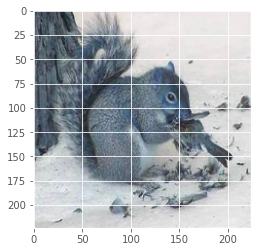

In [260]:
image_id = s_number # Image index in the test set
plt.imshow(X_test[image_id])

In [261]:
def perturb_image(xs, img):
    # If this function is passed just one perturbation vector,
    # pack it in a list to keep the computation the same
    if xs.ndim < 2:
        xs = np.array([xs])
    
    # Copy the image n == len(xs) times so that we can 
    # create n new perturbed images
    tile = [len(xs)] + [1]*(xs.ndim+1)
    imgs = np.tile(img, tile)
    
    # Make sure to floor the members of xs as int types
    xs = xs.astype(int)
    
    for x,img in zip(xs, imgs):
        # Split x into an array of 5-tuples (perturbation pixels)
        # i.e., [[x,y,r,g,b], ...]
        pixels = np.split(x, len(x) // 5)
        for pixel in pixels:
            # At each pixel's x,y position, assign its rgb value
            x_pos, y_pos, *rgb = pixel
            img[x_pos, y_pos] = rgb
    
    return imgs


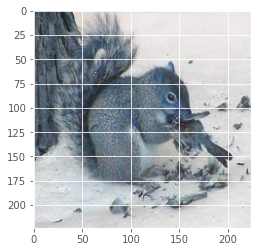

In [262]:
image_id = s_number # Image index in the test set
pixel = np.array([64, 64, 255, 255, 255]) # pixel = x,y,r,g,b
image_perturbed = perturb_image(pixel, X_test[image_id])[0]

plt.imshow(image_perturbed)

In [263]:
original_image_op = np.array([X_test[image_id]])
perturbed_image_op = np.array([image_perturbed])

true_label_op = Y_test[image_id][0]
true_img_prediction_prob = model(original_image_op)
perturbed_img_prediction_prob = model(perturbed_image_op)
print("True Label:", classes[true_label_op])
print("True Image Predictions Label/Class:", classes[np.argmax(true_img_prediction_prob)])
print("Perturbed Image Predictions Label/Class:", classes[np.argmax(perturbed_img_prediction_prob)])


True Label: scoiattolo
True Image Predictions Label/Class: pecora
Perturbed Image Predictions Label/Class: pecora


Since we have already computed major attacks, I have tried onepixel attack. It is fast, not resource hungry. Major drawback of this attack is that it is of the least effective attack.

In [265]:
successful_attacks = 0
for i in range(X_test.shape[0]):
  image_id = i # Image index in the test set
  pixel = np.array([64, 64, 255, 255, 0]) # pixel = x,y,r,g,b
  image_perturbed = perturb_image(pixel, X_test[image_id])[0]
  # plt.imshow(image_perturbed)
  original_image_op = np.array([X_test[image_id]])
  perturbed_image_op = np.array([image_perturbed])
  true_label_op = Y_test[image_id][0]
  true_img_prediction_prob = model(original_image_op)
  perturbed_img_prediction_prob = model(perturbed_image_op)
  if(np.argmax(true_img_prediction_prob) != np.argmax(perturbed_img_prediction_prob)):
    successful_attacks = successful_attacks + 1

# print("True Label:", classes[true_label_op])
# print("True Image Predictions Label/Class:", classes[np.argmax(true_img_prediction_prob)])
# print("Perturbed Image Predictions Label/Class:", classes[np.argmax(perturbed_img_prediction_prob)])
print("Number of Times attack was successful:", successful_attacks)
print("Attack accuracy:", (successful_attacks/X_test.shape[0])*100)


Number of Times attack was successful: 12
Attack accuracy: 0.38167938931297707
